In [160]:
import numpy as np
import pandas as pd

### data extraction from csv files

In [161]:
train_dataset = r"./match_history.csv"
df = pd.read_csv(train_dataset)
df

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,2004-09-03,Spain,Scotland,Europe,Europe,3,67,0,0,1,...,No,Draw,94.0,84.0,86.5,89.3,89.5,80.2,79.7,81.8
1,2004-09-04,Albania,Greece,Europe,Europe,94,14,0,0,2,...,No,Win,NaN,90.0,NaN,59.0,74.5,82.8,83.7,85.2
2,2004-09-04,Austria,England,Europe,Europe,90,7,0,0,2,...,No,Draw,83.0,88.0,76.2,73.0,74.0,90.5,88.7,91.2
3,2004-09-04,Croatia,Hungary,Europe,Europe,25,76,0,0,3,...,No,Win,77.0,74.0,80.5,78.7,79.0,71.8,75.7,70.2
4,2004-09-04,Denmark,Ukraine,Europe,Europe,15,87,0,0,1,...,No,Draw,82.0,NaN,79.5,85.0,81.5,NaN,81.7,65.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5636,2021-12-07,Algeria,Egypt,Africa,Africa,32,45,1508,1449,1,...,No,Draw,78.0,NaN,78.0,81.0,78.0,NaN,79.3,70.8
5637,2021-12-08,Mexico,Chile,North America,South America,14,24,1638,1541,2,...,No,Draw,80.0,79.0,76.8,82.7,78.2,75.5,76.7,78.2
5638,2021-12-11,Morocco,Algeria,Africa,Africa,28,32,1525,1508,2,...,Yes,Lose,82.0,78.0,81.2,81.7,76.2,78.0,81.0,78.0
5639,2021-12-18,Tunisia,Algeria,Africa,Africa,29,32,1512,1508,0,...,No,Lose,NaN,78.0,70.8,72.3,74.0,78.0,81.0,78.0


# Data preprocessing

### Team score data extraction (data extracted to dictionary scores)

In [162]:
train_dataset = r"./match_history.csv"
df = pd.read_csv(train_dataset)


#extract following columns
core_df = df[[
    "date", 
    "home_team", "away_team", 
    "home_team_fifa_rank", "away_team_fifa_rank",  
    'home_team_goalkeeper_score', 'away_team_goalkeeper_score',
    'home_team_mean_defense_score', 'home_team_mean_offense_score',
    'home_team_mean_midfield_score', 'away_team_mean_defense_score',
    'away_team_mean_offense_score', 'away_team_mean_midfield_score',
    'home_team_result', 'home_team_score', 'away_team_score',
    'neutral_location'
    ]].copy()

#simple data modification
core_df = core_df.fillna(0)
core_df["home_team_result"] = core_df["home_team_result"].replace(['Lose', 'Draw', 'Win'], [0, 1, 2])
core_df["neutral_location"] = core_df["neutral_location"].astype(int)
core_df['date'] = core_df['date'].str.replace(r"\D", "")


#variables 
home_score = [
    'home_team_goalkeeper_score', 
    'home_team_mean_defense_score', 
    'home_team_mean_offense_score',
    'home_team_mean_midfield_score',
]

away_score = [
    'away_team_goalkeeper_score',
    'away_team_mean_defense_score',
    'away_team_mean_offense_score', 
    'away_team_mean_midfield_score',
]

#country = np.unique(country_name, return_counts=True)
country_list = df['home_team'].values
country_list = np.unique(country_list)

pos_score = [
    'gk_score',
    'def_score',
    'mid_score',
    'atk_score'
    ]

core_df

C:\Users\Sagat\AppData\Local\Temp\ipykernel_7832\2730174257.py:22: FutureWarning: The default value of regex will change from True to False in a future version.
  core_df['date'] = core_df['date'].str.replace(r"\D", "")


,date,home_team,away_team,home_team_fifa_rank,away_team_fifa_rank,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score,home_team_result,home_team_score,away_team_score,neutral_location
0,20040903,Spain,Scotland,3,67,94.0,84.0,86.5,89.3,89.5,80.2,79.7,81.8,1,1,1,0
1,20040904,Albania,Greece,94,14,0.0,90.0,0.0,59.0,74.5,82.8,83.7,85.2,2,2,1,0
2,20040904,Austria,England,90,7,83.0,88.0,76.2,73.0,74.0,90.5,88.7,91.2,1,2,2,0
3,20040904,Croatia,Hungary,25,76,77.0,74.0,80.5,78.7,79.0,71.8,75.7,70.2,2,3,0,0
4,20040904,Denmark,Ukraine,15,87,82.0,0.0,79.5,85.0,81.5,0.0,81.7,65.8,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5636,20211207,Algeria,Egypt,32,45,78.0,0.0,78.0,81.0,78.0,0.0,79.3,70.8,1,1,1,1
5637,20211208,Mexico,Chile,14,24,80.0,79.0,76.8,82.7,78.2,75.5,76.7,78.2,1,2,2,1
5638,20211211,Morocco,Algeria,28,32,82.0,78.0,81.2,81.7,76.2,78.0,81.0,78.0,0,2,2,1
5639,20211218,Tunisia,Algeria,29,32,0.0,78.0,70.8,72.3,74.0,78.0,81.0,78.0,0,0,2,1


### Score data in dictionary scores

In [163]:
scores = {}


for index, row in core_df.iterrows():
    home = row['home_team']
    away = row['away_team']
    
    if home not in scores:
        scores[home] = {}
        scores[home]['gk_score'] = []
        scores[home]['def_score'] = []
        scores[home]['mid_score'] = []
        scores[home]['atk_score'] = []
        
    if away not in scores:
        scores[away] = {}
        scores[away]['gk_score'] = []
        scores[away]['def_score'] = []
        scores[away]['mid_score'] = []
        scores[away]['atk_score'] = []
    
    scores[home]['gk_score'].append([row['date'], row['home_team_goalkeeper_score']])
    scores[home]['def_score'].append([row['date'], row['home_team_mean_defense_score']])
    scores[home]['mid_score'].append([row['date'], row['home_team_mean_midfield_score']])
    scores[home]['atk_score'].append([row['date'],row['home_team_mean_offense_score']])
    
    scores[away]['gk_score'].append([row['date'], row['away_team_goalkeeper_score']])
    scores[away]['def_score'].append([row['date'], row['away_team_mean_defense_score']])
    scores[away]['mid_score'].append([row['date'], row['away_team_mean_midfield_score']])
    scores[away]['atk_score'].append([row['date'],row['away_team_mean_offense_score']])
    

### Feature Engineering

### Score data preprocessing

In [164]:
# fetch according country, position_team_mean_score from dict scores 
# if 0 not included in the data, returns an empty list => no missing values, no prediction needed
def fetch_country_pos_score(country, pos_score):
    predict_target = []
    model_data = []
    
    for item in scores[country][pos_score]:
        if 0 in item:
            predict_target.append(item)
        else:
            model_data.append(item)
            
    if predict_target == []:
        #print("No missing values")
        return []
            
    else:
        #if model_data == []:
            #print("No data available")
        #else:
            #print("Missing", len(predict_target), "values")   
        
        data = [model_data, predict_target]

        # model_data and predict_target to np float array
        data[0] = np.array(data[0]).astype(float)
        data[1] = np.array(data[1]).astype(float)

        return data

fetch_country_pos_score('Albania','gk_score')


[array([[2.0070912e+07, 5.2000000e+01],
        [2.0071013e+07, 5.2000000e+01],
        [2.0071017e+07, 5.2000000e+01],
        [2.0071121e+07, 5.2000000e+01],
        [2.0080527e+07, 5.2000000e+01],
        [2.0080906e+07, 5.1000000e+01],
        [2.0081011e+07, 5.1000000e+01],
        [2.0081015e+07, 5.1000000e+01],
        [2.0090328e+07, 5.1000000e+01],
        [2.0090401e+07, 5.1000000e+01],
        [2.0090606e+07, 5.1000000e+01],
        [2.0090610e+07, 5.1000000e+01],
        [2.0090909e+07, 6.5000000e+01],
        [2.0091014e+07, 6.5000000e+01],
        [2.0091114e+07, 6.5000000e+01],
        [2.0100303e+07, 6.5000000e+01],
        [2.0100525e+07, 6.5000000e+01],
        [2.0100903e+07, 6.9000000e+01],
        [2.0101008e+07, 6.9000000e+01],
        [2.0101012e+07, 6.9000000e+01],
        [2.0101117e+07, 6.9000000e+01],
        [2.0110209e+07, 6.9000000e+01],
        [2.0110326e+07, 6.9000000e+01],
        [2.0110607e+07, 6.9000000e+01],
        [2.0110620e+07, 6.9000000e+01],


In [165]:
def fetch_country_score(country):
    data = []
    
    #index 0: gk, index 1: def, index 2: mid, index 3: atk
    for score in pos_score:
        #print(score,": ",end = "")
        data.append(fetch_country_pos_score(country,score))
    
    return data

fetch_country_score('Albania')

[[array([[2.0070912e+07, 5.2000000e+01],
         [2.0071013e+07, 5.2000000e+01],
         [2.0071017e+07, 5.2000000e+01],
         [2.0071121e+07, 5.2000000e+01],
         [2.0080527e+07, 5.2000000e+01],
         [2.0080906e+07, 5.1000000e+01],
         [2.0081011e+07, 5.1000000e+01],
         [2.0081015e+07, 5.1000000e+01],
         [2.0090328e+07, 5.1000000e+01],
         [2.0090401e+07, 5.1000000e+01],
         [2.0090606e+07, 5.1000000e+01],
         [2.0090610e+07, 5.1000000e+01],
         [2.0090909e+07, 6.5000000e+01],
         [2.0091014e+07, 6.5000000e+01],
         [2.0091114e+07, 6.5000000e+01],
         [2.0100303e+07, 6.5000000e+01],
         [2.0100525e+07, 6.5000000e+01],
         [2.0100903e+07, 6.9000000e+01],
         [2.0101008e+07, 6.9000000e+01],
         [2.0101012e+07, 6.9000000e+01],
         [2.0101117e+07, 6.9000000e+01],
         [2.0110209e+07, 6.9000000e+01],
         [2.0110326e+07, 6.9000000e+01],
         [2.0110607e+07, 6.9000000e+01],
         [2.0110

### Show data

In [166]:
import matplotlib.pyplot as plt

# plot data based on country and pos_score info
def show_model_data(country, pos_score):
    data = fetch_country_pos_score(country, pos_score)
    
    # don't draw graph if there is no data to draw
    if data == [] or len(data[0]) == 0:
        return
    else:
        model_data = data[0]
        d = np.hsplit(model_data,2)
        plt.scatter(d[0],d[1])
        plt.xlabel('time')
        plt.ylabel(pos_score)
        plt.title("{} {}".format(country,pos_score))
        plt.show()

#show_model_data('Congo','mid_score')
show_model_data('Azerbaijan', 'def_score')

In [167]:
import matplotlib.pyplot as plt


# displays the variables that needs to be investigated to generate missing values
# so for Albania case, gk and def scores contain missing values => target for prediction
def show_model_data(country):
    print("-------------------------------")
    print(country, "Position Scores")
    print("-------------------------------")

    count = 0
    data = fetch_country_score(country)
    
    for elem in data:
        count += 1
        # again, don't display graph if there is no data
        if elem == [] or len(elem[0]) == 0:
            pass
        else:
            model_data = elem[0]
            d = np.hsplit(model_data,2)
            plt.scatter(d[0],d[1])
            plt.xlabel('time')
            if count == 1:
                plt.title("{} {}".format(country,'gk_score'))
                plt.ylabel('gk_score')
            elif count == 2:
                plt.title("{} {}".format(country,'def_score'))
                plt.ylabel('def_score')
            elif count == 3:
                plt.title("{} {}".format(country,'mid_score'))
                plt.ylabel('mid_score')
            else:
                plt.title("{} {}".format(country,'atk_score'))
                plt.ylabel('atk_score')
            plt.show()

#show_model_data('Albania')
show_model_data('Azerbaijan')

-------------------------------
Azerbaijan Position Scores
-------------------------------


In [168]:
# display all prediction targets
'''
for country in country_list:
    show_model_data(country)
    print("\n")
'''

'\nfor country in country_list:\n    show_model_data(country)\n    print("\n")\n'

In [169]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

def lr_model(model_data):
    d = np.hsplit(model_data,2)
    date = d[0]
    pos = d[1]
    
    train_input, test_input, train_target, test_target = train_test_split(
    date, pos, random_state=42)
    
    lr = LinearRegression()

    lr.fit(train_input, train_target)
    print("Score: {}".format(lr.score(test_input, test_target)))
    
    return lr
    
data = fetch_country_pos_score('Albania', 'gk_score')
lr_model(data[0])

Score: 0.7899949532841467


LinearRegression()

### Gaussian Distribution

### Generate Data with Gaussian

In [170]:
import scipy.stats as stats
from statistics import mean
from scipy.stats import truncnorm

#translates from sample to sd space given a distribution's mean and sd
def sample_to_sd(sample, mean, sd):
    return (sample - mean) / sd

# use truncated gaussian bounded at lower and upper limits
def generate_truncated_gaussian(params):
    mean = params[0]
    sd = params[1]
    lower = params[2]
    upper = params[3]

    return truncnorm(sample_to_sd(lower, mean, sd), sample_to_sd(upper, mean, sd), loc= mean, scale = sd)

def get_gaussian_parameters(data):
    # average data for each score
    avg = np.mean(data[0], axis=0)[1]
    #avdef = np.mean(fetch_country_pos_score('Albania','def_score')[0], axis=0)[1]

    # variance data for each scores for Albania
    var= np.var(data[0], axis=0)[1]
    sd = np.sqrt(var)
    #vardef= np.var(fetch_country_pos_score('Albania','def_score')[0], axis=0)[1]

    #min and max to truncate gaussian
    min = np.amin(data[0], axis=0)[1]
    max = np.amax(data[0], axis=0)[1]

    return [avg, sd, min, max]

def sample_truncated_gaussian(data):
    params = get_gaussian_parameters(data)
    dist = generate_truncated_gaussian(params)

    if isinstance(dist, int):
        return dist

    return dist.rvs(1)[0]

In [171]:
def fetch_gaussian_pos_score(country, pos_score):
    data = fetch_country_pos_score(country, pos_score)
    #in this case there is no data at all for the position score; use the median score 75
    if len(data[0]) == 0:
        return 75.0

    #subroutine to check if all data values are the same (invalid variance)
    sum = 0
    ln = len(data[0])
    for i in range(ln):
        sum += data[0][i][1]
    if sum/ln == data[0][0][1]:
        return data[0][0][1]


    return sample_truncated_gaussian(data)

fetch_gaussian_pos_score('Honduras', 'gk_score')

61.0

-------------------------------
Congo Position Scores
-------------------------------


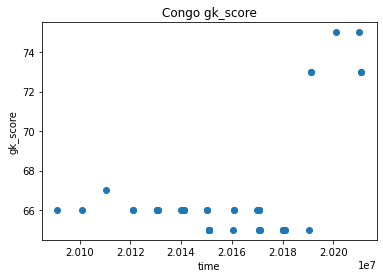

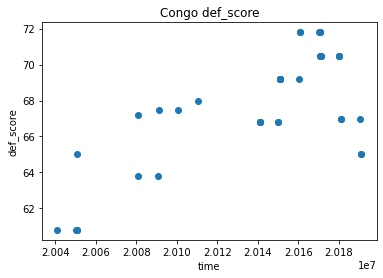

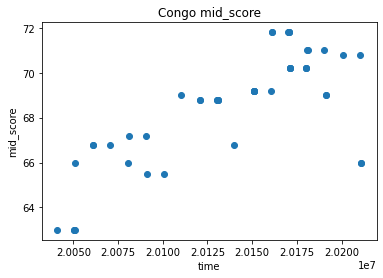

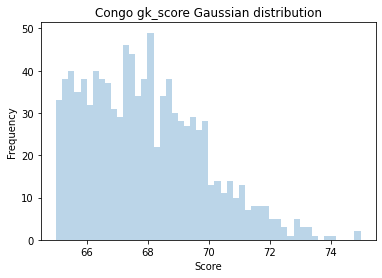

true mean =  66.68888888888888
standard deviation =  2.8033489672352188
min =  65.0
max =  75.0


In [172]:
show_model_data('Congo')

# gaussian distribution for country, pos_score
def show_gaussian_pos_score(country, pos_score):
    data = fetch_country_pos_score(country, pos_score)
    params = get_gaussian_parameters(data)

    X = generate_truncated_gaussian(params)
    plt.hist(X.rvs(1000), bins= 50, alpha=0.3)
    plt.title("{} {} Gaussian distribution".format(country, pos_score))
    plt.xlabel("Score")
    plt.ylabel("Frequency")
    plt.show()

    print("true mean = ", params[0])
    print("standard deviation = ", params[1])
    print("min = ", params[2])
    print("max = ", params[3])


show_gaussian_pos_score('Congo', 'gk_score')

In [173]:
def fill_record_pos_scores(record):
    #countries in this record
    home = record['home_team']
    away = record['away_team']

    features = [
    'home_team_goalkeeper_score',
    'away_team_goalkeeper_score',
    'home_team_mean_defense_score',
    'away_team_mean_defense_score',
    'home_team_mean_offense_score',
    'away_team_mean_offense_score',
    'home_team_mean_midfield_score',
    'away_team_mean_midfield_score',
    ]

    #dictionary to check if a value corresponds to home or away team, and give the position
    check = {
    'home_team_goalkeeper_score':[1, 'gk_score'],
    'away_team_goalkeeper_score':[0, 'gk_score'],
    'home_team_mean_defense_score':[1, 'def_score'],
    'away_team_mean_defense_score':[0, 'def_score'],
    'home_team_mean_offense_score':[1, 'atk_score'],
    'away_team_mean_offense_score':[0, 'atk_score'],
    'home_team_mean_midfield_score':[1, 'mid_score'],
    'away_team_mean_midfield_score':[0, 'mid_score']
    }

    for feature in features:
        if record[feature] == 0:
            country = home
            if check[feature][0] == 0: 
                country = away
            position = check[feature][1]

            val = fetch_gaussian_pos_score(country, position)
            record[feature] = val
            #print(country, position, ":", val)

def fill_df_pos_scores(df):
    for index, record in df.iterrows():
        fill_record_pos_scores(record)

#fill_df_pos_scores(core_df)

### Comparing Results

In [174]:
from sklearn.linear_model import LogisticRegression
from collections import Counter

def logistic_regression_model(X, y):
    X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X, y)

    lr_model = LogisticRegression(random_state=0, max_iter=500).fit(X_train_lr, y_train_lr)
    lr_predictions = lr_model.predict(X_test_lr)

    return np.mean(lr_predictions == y_test_lr.values)*100

In [175]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

def svm_model(X, y):
    X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X, y)
    svm_model = make_pipeline(StandardScaler(), SVC(kernel='poly')).fit(X_train_svm, y_train_svm)
    svm_predictions = svm_model.predict(X_test_svm)

    return np.mean(svm_predictions == y_test_svm.values)*100

In [176]:
def test_model(func, num, X, y):
    sum = 0
    for i in range(num):
        sum += func(X, y)
    return sum/num

In [177]:
X1 = core_df[[
       'home_team_fifa_rank', 'away_team_fifa_rank',
       'home_team_goalkeeper_score', 'away_team_goalkeeper_score',
       'home_team_mean_defense_score', 'home_team_mean_offense_score',
       'home_team_mean_midfield_score', 'away_team_mean_defense_score',
       'away_team_mean_offense_score', 'away_team_mean_midfield_score'
]].copy()

y = core_df["home_team_result"]

base_lr = test_model(logistic_regression_model, 3, X1, y)
base_svm = test_model(svm_model, 3, X1, y)

#now getting data filled with the gaussian distribution
X2 = core_df[[
       "home_team", "away_team",
       'home_team_fifa_rank', 'away_team_fifa_rank',
       'home_team_goalkeeper_score', 'away_team_goalkeeper_score',
       'home_team_mean_defense_score', 'home_team_mean_offense_score',
       'home_team_mean_midfield_score', 'away_team_mean_defense_score',
       'away_team_mean_offense_score', 'away_team_mean_midfield_score'
]].copy()
fill_df_pos_scores(X2)
del X2['home_team']
del X2['away_team']

filled_lr = test_model(logistic_regression_model, 3, X2, y)
filled_svm = test_model(svm_model, 3, X2, y)

print("Base LR:", base_lr)
print("Base SVM:", base_svm)
print("\n")
print("Filled LR:", filled_lr)
print("Filled_SVM:", filled_svm)

Base LR: 53.531774155445305
Base SVM: 48.99598393574297


Filled LR: 53.082919914953926
Filled_SVM: 48.87786439877156


### Box Plot of Postion Score Distributions ###

In [178]:
def gather_position_scores(df):
    #array of scores for each position:
    #goalkeeper, defense, attack, midfield

    pos_scores = [[], [], [], []]

    features = [
    'home_team_goalkeeper_score',
    'away_team_goalkeeper_score',
    'home_team_mean_defense_score',
    'away_team_mean_defense_score',
    'home_team_mean_offense_score',
    'away_team_mean_offense_score',
    'home_team_mean_midfield_score',
    'away_team_mean_midfield_score',
    ]

    #dictionary to check what index feature corresponds to in pos_scores array
    check = {
    'home_team_goalkeeper_score':0,
    'away_team_goalkeeper_score':0,
    'home_team_mean_defense_score':1,
    'away_team_mean_defense_score':1,
    'home_team_mean_offense_score':2,
    'away_team_mean_offense_score':2,
    'home_team_mean_midfield_score':3,
    'away_team_mean_midfield_score':3
    }

    for index, record in df.iterrows():
        for feature in features:
            if record[feature]:
                pos_scores[check[feature]].append(record[feature])

    return pos_scores

#print(gather_position_scores(core_df))

In [179]:
def draw_box_plot(data, title):
    plt.boxplot(data)
    plt.title(title)
    plt.show()

#draw_box_plot([1, 2, 2, 3, 4, 3, 5, 9, 1, 2, 2, 2, 2], "Example Plot")

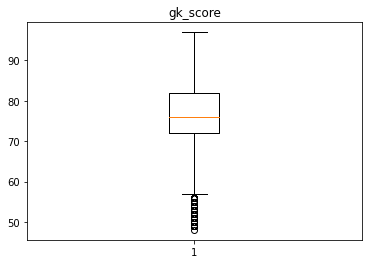

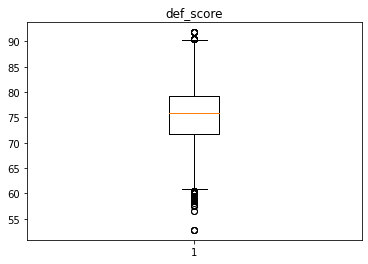

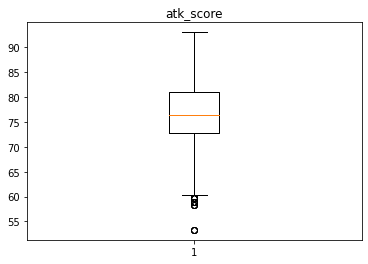

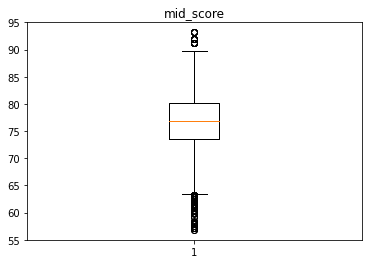

In [180]:
def draw_position_box_plots(df):
    position_scores = gather_position_scores(df)
    pos_names = [
    'gk_score',
    'def_score',
    'atk_score',
    'mid_score'
    ]

    for i in range(len(pos_names)):
        draw_box_plot(position_scores[i], pos_names[i])

draw_position_box_plots(core_df)

### Feature Engineering ###

In [181]:
def fill_score_average_record(record, df, index):
    #countries in this record

    home_score = [
    'home_team_goalkeeper_score', 
    'home_team_mean_defense_score', 
    'home_team_mean_offense_score',
    'home_team_mean_midfield_score',
    ]

    away_score = [
    'away_team_goalkeeper_score',
    'away_team_mean_defense_score',
    'away_team_mean_offense_score', 
    'away_team_mean_midfield_score',
    ]

    home_total = 0
    away_total = 0

    for feature in home_score:
        home_total += record[feature]
    for feature in away_score:
        away_total += record[feature]
    
    home_total /= len(home_score)
    away_total /= len(away_score)

    #print(home_total, away_total)

    df.at[index, 'home_team_total_average'] = home_total
    df.at[index, 'away_team_total_average'] = away_total
    

def create_score_averages(df):
    #first, create the new column for home advantage feature
    df['home_team_total_average'] = ''
    df['away_team_total_average'] = ''
    for index, record in df.iterrows():
        fill_score_average_record(record, df, index)

create_score_averages(core_df)

In [182]:
def fill_goal_difference_record(record, df, index):
    #countries in this record

    home_goals = record['home_team_score']
    away_goals = record['away_team_score']
    goal_diff = home_goals - away_goals

    print(goal_diff)

    df.at[index, 'home_team_goal_difference'] = goal_diff
    

def create_goal_differences(df):
    #first, create the new column for home score difference feature
    df['home_team_goal_difference'] = ''
    for index, record in df.iterrows():
        fill_goal_difference_record(record, df, index)
    del df['home_team_score']
    del df['away_team_score']

create_goal_differences(core_df)

0
1
0
3
0
-2
1
0
-3
-2
1
0
0
1
0
2
0
1
0
0
1
2
-1
0
-1
0
-2
0
-2
2
-2
0
0
1
2
0
0
-1
1
2
3
0
0
1
0
-2
0
0
-3
3
2
0
3
0
6
-1
0
1
-1
0
3
1
-2
4
-3
0
1
1
-3
1
0
-1
-3
2
1
0
0
0
0
3
1
-1
0
0
0
1
0
1
2
-1
0
-3
0
-1
2
1
-2
0
0
3
1
3
-3
0
4
1
4
0
2
1
3
-2
-1
3
2
-2
1
-1
1
1
1
1
2
0
0
-1
1
1
0
0
1
0
0
1
3
-1
1
1
-1
1
-1
-2
5
-1
2
-3
0
2
0
3
1
3
0
1
0
2
5
2
-4
0
-1
2
0
-1
1
2
-3
1
1
3
-1
-2
3
0
0
-2
0
-1
1
-2
0
2
0
0
-1
0
3
1
1
-1
1
2
0
2
0
1
2
-1
0
0
-1
0
2
2
0
3
3
-1
3
-1
-3
2
-1
0
-2
0
2
1
1
0
1
2
-2
2
1
1
2
0
2
-1
1
3
0
2
-1
-1
-3
5
-1
1
1
2
5
4
2
-1
-1
1
-1
1
0
-1
1
-2
2
0
3
1
-2
1
1
-1
1
-1
3
0
0
0
1
5
-1
2
1
-3
1
1
0
0
2
0
-1
0
-3
2
1
1
2
1
0
2
4
1
0
0
-2
-1
2
-1
0
-1
4
2
1
0
0
1
1
1
0
-3
3
0
2
2
3
0
2
0
2
0
-1
-2
3
0
1
2
-1
1
2
1
2
2
5
-3
1
1
-1
0
0
-1
-1
1
1
-1
2
0
-2
-1
-2
1
-1
1
3
3
1
-1
1
-1
-1
-2
1
-2
1
-1
0
0
3
1
0
-1
-4
1
0
0
-1
-3
0
-2
-1
0
-1
0
1
0
2
2
0
0
1
1
0
0
0
0
1
0
-1
4
-3
2
0
1
2
0
-1
2
-1
3
2
0
1
0
-1
3
0
0
0
-1
3
6
3
2
2
0
-3
-1
2
1
2
1
1
0
-1
2
-1
2
2
-3
1
0
1
1
4
2


In [183]:
def fill_rank_difference_record(record, df, index):
    #countries in this record

    home_rank = record['home_team_fifa_rank']
    away_rank = record['away_team_fifa_rank']
    rank_diff = home_rank - away_rank

    print(rank_diff)

    df.at[index, 'home_team_rank_difference'] = rank_diff
    

def create_rank_differences(df):
    #first, create the new column for home rank difference feature
    df['home_team_rank_difference'] = ''
    for index, record in df.iterrows():
        fill_rank_difference_record(record, df, index)

create_rank_differences(core_df)

-64
80
83
-51
-72
39
-29
-3
80
59
-56
-45
38
40
12
-3
66
-66
10
1
-4
1
22
21
-3
33
57
-52
74
-14
56
5
-18
-20
-50
-12
87
31
35
-31
-46
64
52
47
-27
63
76
3
66
-54
-40
25
-6
-45
-25
28
14
-9
39
-24
-6
-33
86
-49
62
15
20
-3
-55
-5
-42
19
1
8
4
8
-8
-6
-37
-10
-7
20
2
-11
13
4
37
3
-22
19
-25
38
-20
50
5
-16
42
-20
3
-15
-63
-26
26
59
-71
-32
-103
-47
-78
-54
-75
22
26
-52
-73
-9
-69
-33
-4
-45
-23
9
-74
30
-85
65
-46
-84
45
39
29
14
-17
15
-33
4
-69
-11
22
-65
18
22
-38
28
-27
95
26
-39
2
-11
-4
-28
84
-15
50
2
-94
-74
32
-11
-27
-55
-73
-23
-43
-52
16
-35
-36
-12
12
54
-17
-43
-30
-37
37
-5
5
19
18
37
7
17
20
3
-2
15
52
61
33
-75
2
-33
-14
-35
-31
-19
-35
-43
8
-15
34
34
19
11
-35
63
56
1
49
-16
-32
-8
-6
-30
-17
11
-47
35
26
53
74
-51
33
-49
27
73
34
12
-76
-31
-6
1
76
16
51
-72
16
1
-48
-32
-85
-49
-27
50
5
109
-50
-61
20
24
-75
39
-21
-50
12
14
2
-6
-68
8
-39
19
-20
-30
32
-13
-3
9
74
-22
-6
36
-45
-84
42
-17
8
-94
8
15
-22
-82
51
22
-11
-15
48
-16
-54
5
-10
16
-10
34
-10
-20
55
12


### Explort Dataset ###

In [184]:
core_df.to_csv("gaussian_feature_match_history.csv")